<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">About the Dataset</h2>

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [2]:
# Read the CSV file
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Display the Data shape of the DataFrame
df.shape

(1460, 81)

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# This code generates a descriptive statistics summary of a DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Visualizing the correlations between numerical variables**

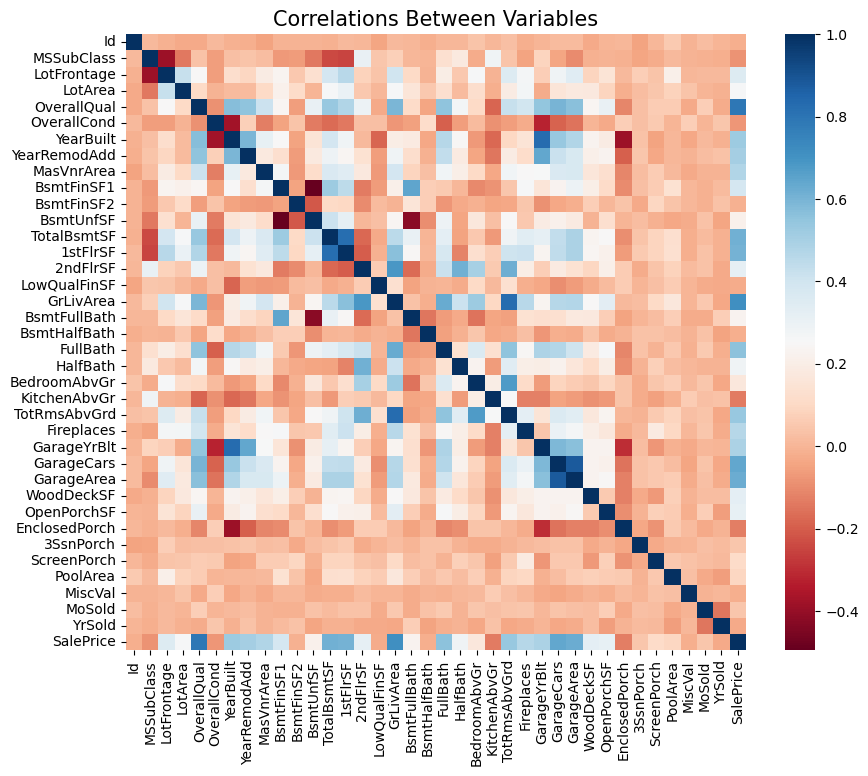

In [7]:
def plot_correlations(df):
    """
    Plots a heatmap of correlations between variables in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the variables.

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap="RdBu")
    plt.title("Correlations Between Variables", size=15)
    plt.show()

plot_correlations(df)


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

In [8]:
# Filter columns based on correlation with SalePrice
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"] > 0.50) | (df.corr()["SalePrice"] < -0.50)].index)

# List of categorical columns
cat_cols = ["MSZoning", "Utilities", "BldgType", "Heating", "KitchenQual", "SaleCondition", "LandSlope"]

# Combine important numerical and categorical columns
important_cols = important_num_cols + cat_cols

# Update the DataFrame with the selected columns
df = df[important_cols]

***Checking for the missing values***

In [9]:
# Print the missing values by column
print("Missing Values by Column")
print("-" * 20)
print(df.isna().sum())
print("-" * 20)
# Print the total number of missing values
print("TOTAL MISSING VALUES:", df.isna().sum().sum())

Missing Values by Column
--------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
--------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Visualization</h1>

***Visualizing the Correlation between the numerical variables using pairplot visualization***

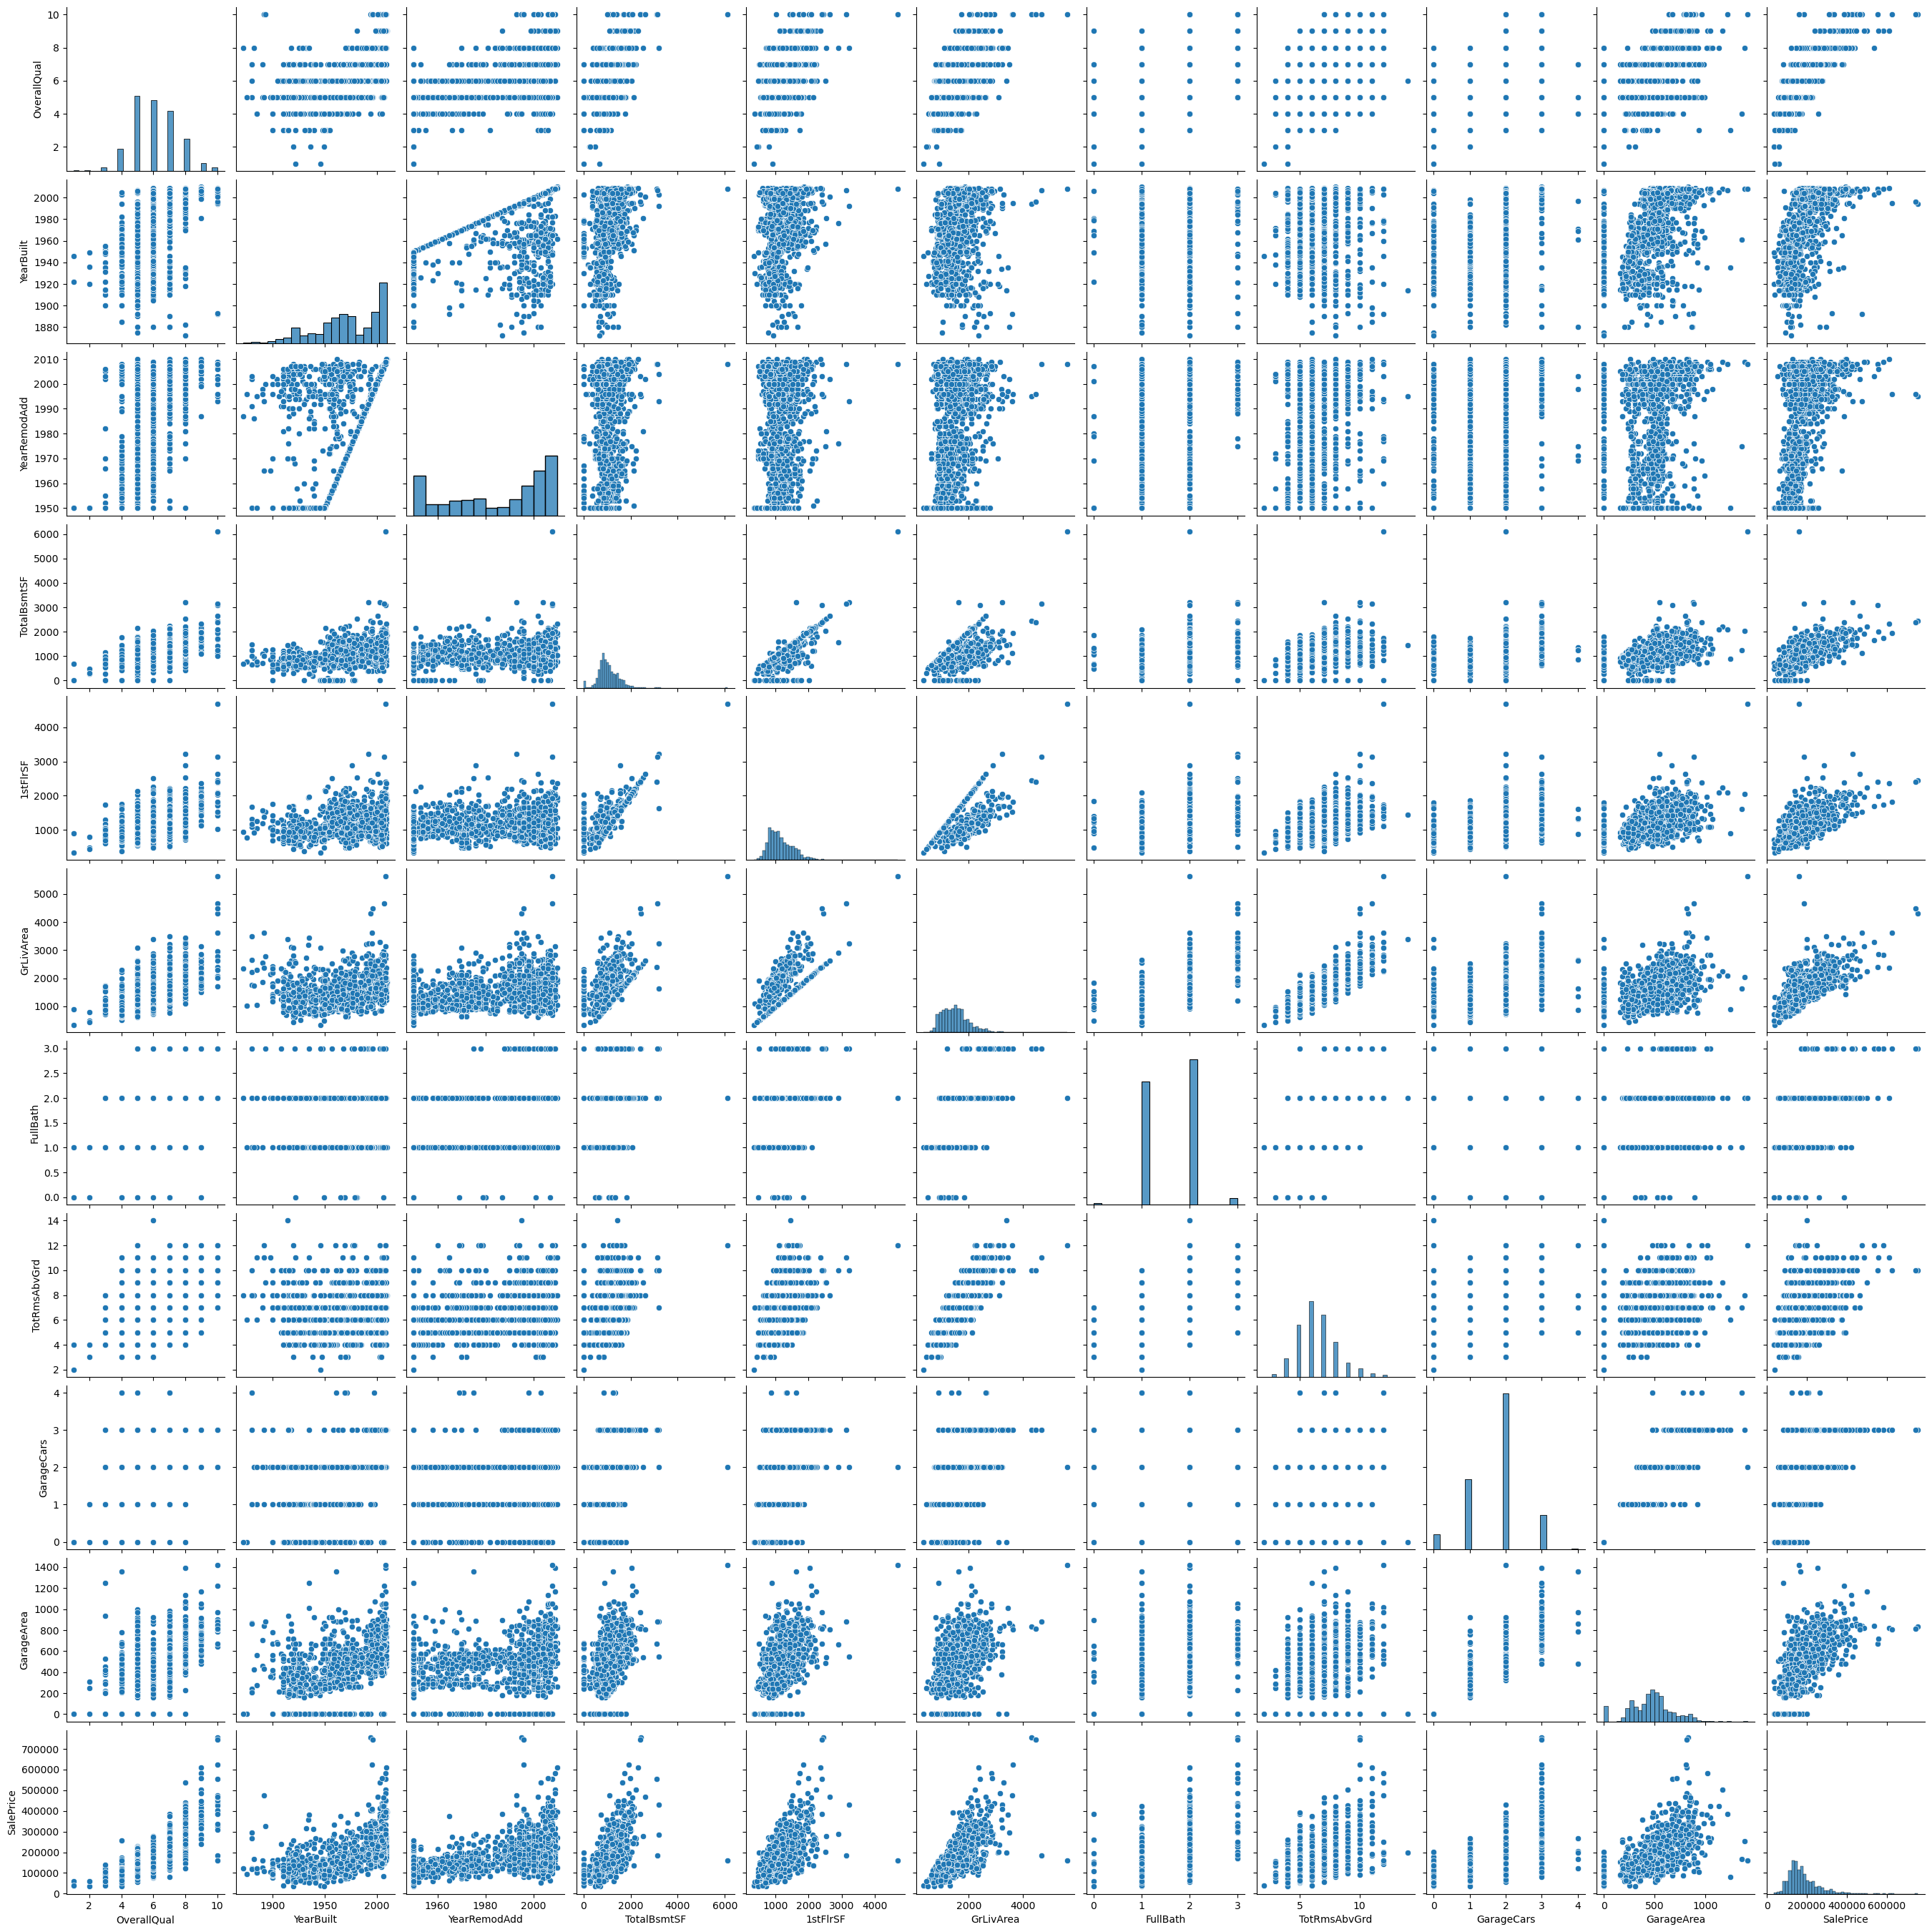

In [10]:
# Plot pairwise relationships in a dataset
sns.pairplot(df[important_num_cols])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [11]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

<h1 style="font-family: 'Times New Roman';letter-spacing: 0.08em;">One-Hot Encoding</h1>

In [12]:
#Encoding the categorical features in X dataset by using One-Hot Encoding method
X = pd.get_dummies(X, columns=cat_cols)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

In [13]:
important_num_cols.remove("SalePrice")

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected numerical columns in X
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

***As you can see, standardization is done successfully***

In [14]:
# Print the first few rows of the DataFrame
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

***Splitting the data into Train and Test chunks for better evaluation***

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Defining several evaluation functions for convenience***

In [16]:
def rmse_cv(model, X, y):
    """
    Calculate the root mean squared error (RMSE) using cross-validation.
    
    Parameters:
        model (object): The regression model.
        X (array-like): The input features.
        y (array-like): The target variable.
        
    Returns:
        float: The average RMSE across cross-validation folds.
    """
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    """
    Calculate evaluation metrics for regression.
    
    Parameters:
        y (array-like): The true values of the target variable.
        predictions (array-like): The predicted values of the target variable.
        
    Returns:
        tuple: A tuple containing the mean absolute error (MAE), mean squared error (MSE),
        root mean squared error (RMSE), and R-squared (coefficient of determination).
    """
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

In [17]:
# Create a DataFrame to store model metrics
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [18]:
# Creating an instance of LinearRegression
lr = LinearRegression()

# Fitting the model on training data
lr.fit(X_train, y_train)

# Making predictions on test data
predictions = lr.predict(X_test)

# Calculating evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)

# Printing the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculating RMSE using cross-validation
rmse_cross_val = rmse_cv(lr, X, y)

# Printing the cross-validated RMSE
print("RMSE Cross-Validation:", rmse_cross_val)

# Adding model evaluation metrics to a new row
new_row = {
    "Model": "LinearRegression",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Appending the new row to the existing dataframe
models = models.append(new_row, ignore_index=True)

MAE: 23044.387080596556
MSE: 1231865269.1071658
RMSE: 35097.938245816746
R2 Score: 0.8234667931802987
------------------------------
RMSE Cross-Validation: 195519288183.26282


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [19]:
# Creating an instance of Ridge Regression
ridge = Ridge()

# Fitting the model on training data
ridge.fit(X_train, y_train)

# Making predictions on test data
predictions = ridge.predict(X_test)

# Printing the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculating RMSE using cross-validation
rmse_cross_val = rmse_cv(ridge, X, y)  # Pass 'X' and 'y' to the function
print("RMSE Cross-Validation:", rmse_cross_val)

# Adding model evaluation metrics to a new row
new_row = {
    "Model": "Ridge",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)

MAE: 22939.681422868427
MSE: 1222947403.245637
RMSE: 34970.66489567559
R2 Score: 0.8247447734091469
------------------------------
RMSE Cross-Validation: 35887.852791598336


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [20]:
# Creating an instance of Lasso Regression
lasso = Lasso()

# Fitting the model on training data
lasso.fit(X_train, y_train)

# Making predictions on test data
predictions = lasso.predict(X_test)

# Evaluation
mae, mse, rmse, r_squared = evaluation(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Cross-validation
rmse_cross_val = rmse_cv(lasso, X, y)  # Provide 'X' and 'y' as arguments
print("RMSE Cross-Validation:", rmse_cross_val)

# Appending results to models
new_row = {
    "Model": "Lasso",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)


MAE: 23039.573118526547
MSE: 1231461222.5681832
RMSE: 35092.18178694769
R2 Score: 0.8235246953170174
------------------------------
RMSE Cross-Validation: 35922.76936876075


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [21]:
# Creating an instance of Elastic Net
elastic_net = ElasticNet()

# Fitting the model on training data
elastic_net.fit(X_train, y_train)

# Making predictions on test data
predictions = elastic_net.predict(X_test)

# Evaluating the predictions
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculating RMSE using cross-validation
rmse_cross_val = rmse_cv(elastic_net, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

# Creating a new row for the model's results
new_row = {
    "Model": "ElasticNet",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)


MAE: 23457.574876923518
MSE: 1512979761.9465086
RMSE: 38897.040529409285
R2 Score: 0.7831815086212242
------------------------------
RMSE Cross-Validation: 38449.00864609558


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [22]:
# Creating an instance of SVM
svm = SVR(C=100000)

# Fitting the SVR model on training data
svm.fit(X_train, y_train)

# Making predictions on the test data
predictions = svm.predict(X_test)

# Evaluating the predictions
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculating RMSE using cross-validation
rmse_cross_val = rmse_cv(svm, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

# Adding the model results to the dataframe
new_row = {
    "Model": "SVR",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)

MAE: 17546.837231354722
MSE: 923192238.4757502
RMSE: 30384.078700460053
R2 Score: 0.8677013708753203
------------------------------
RMSE Cross-Validation: 30745.475239075844


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [23]:
# Creating an instance of RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)

# Fitting the SVR model on training data
random_forest.fit(X_train, y_train)

# Predicting with the trained model
predictions = random_forest.predict(X_test)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(random_forest , X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

# Add the model results to the dataframe
new_row = {
    "Model": "RandomForestRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)

MAE: 17324.261143183303
MSE: 826415865.5364403
RMSE: 28747.449722304766
R2 Score: 0.8815699682680678
------------------------------
RMSE Cross-Validation: 31102.061387807866


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

In [24]:
# Focal cell

# Create XGBRegressor object
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb.predict(X_test)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(xgb, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

# Create a new row with the model evaluation metrics
new_row = {
    "Model": "XGBRegressor",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}

# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)


MAE: 17789.558914811645
MSE: 736303355.326559
RMSE: 27134.910269366268
R2 Score: 0.8944835967312301
------------------------------
RMSE Cross-Validation: 29686.71874969576


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Polynomial Regression </h2>

In [25]:
# Creating an instance of PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

# Fitting the Polynomial model on training data
X_train_2d = poly_reg.fit_transform(X_train)
# Fitting the Polynomial model on testing data
X_test_2d = poly_reg.transform(X_test)

# Creating an instance of LinearRegression
lin_reg = LinearRegression()
# Fitting the LinearRegression model on training data
lin_reg.fit(X_train_2d, y_train)

# Make predictions on testing data
predictions = lin_reg.predict(X_test_2d)

# Evaluate the model
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(lin_reg, X, y)
print("RMSE Cross-Validation:", rmse_cross_val)

# Append the model's performance to the models dataframe
new_row = {
    "Model": "Polynomial Regression (degree=2)",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R2 Score": r_squared,
    "RMSE (Cross-Validation)": rmse_cross_val
}
# Append the new row to the models dataframe
models = models.append(new_row, ignore_index=True)

MAE: 904521533319588.4
MSE: 2.449509476809971e+31
RMSE: 4949251940253164.0
R2 Score: -3.5102845572545695e+21
------------------------------
RMSE Cross-Validation: 195519288183.26282


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [26]:
# Sort the models by "RMSE (Cross-Validation)"
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBRegressor,1.778956e+04,7.363034e+08,2.713491e+04,8.944836e-01,2.968672e+04
4,SVR,1.754684e+04,9.231922e+08,3.038408e+04,8.677014e-01,3.074548e+04
5,RandomForestRegressor,1.732426e+04,8.264159e+08,2.874745e+04,8.815700e-01,3.110206e+04
1,Ridge,2.293968e+04,1.222947e+09,3.497066e+04,8.247448e-01,3.588785e+04
2,Lasso,2.303957e+04,1.231461e+09,3.509218e+04,8.235247e-01,3.592277e+04
3,ElasticNet,2.345757e+04,1.512980e+09,3.889704e+04,7.831815e-01,3.844901e+04
0,LinearRegression,2.304439e+04,1.231865e+09,3.509794e+04,8.234668e-01,1.955193e+11
7,Polynomial Regression (degree=2),9.045215e+14,2.449509e+31,4.949252e+15,-3.510285e+21,1.955193e+11


In [27]:
def plot_rmse_scores(models):
    """
    Plot models' RMSE scores (Cross-Validated).

    Args:
        models (pd.DataFrame): DataFrame containing model names and RMSE scores.

    Returns:
        None
    """
    plt.figure(figsize=(12, 8))
    sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
    plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
    plt.xticks(rotation=30, size=12)
    plt.show()
# there have some techniqual issue that is the reasion of color invisible of this bins.

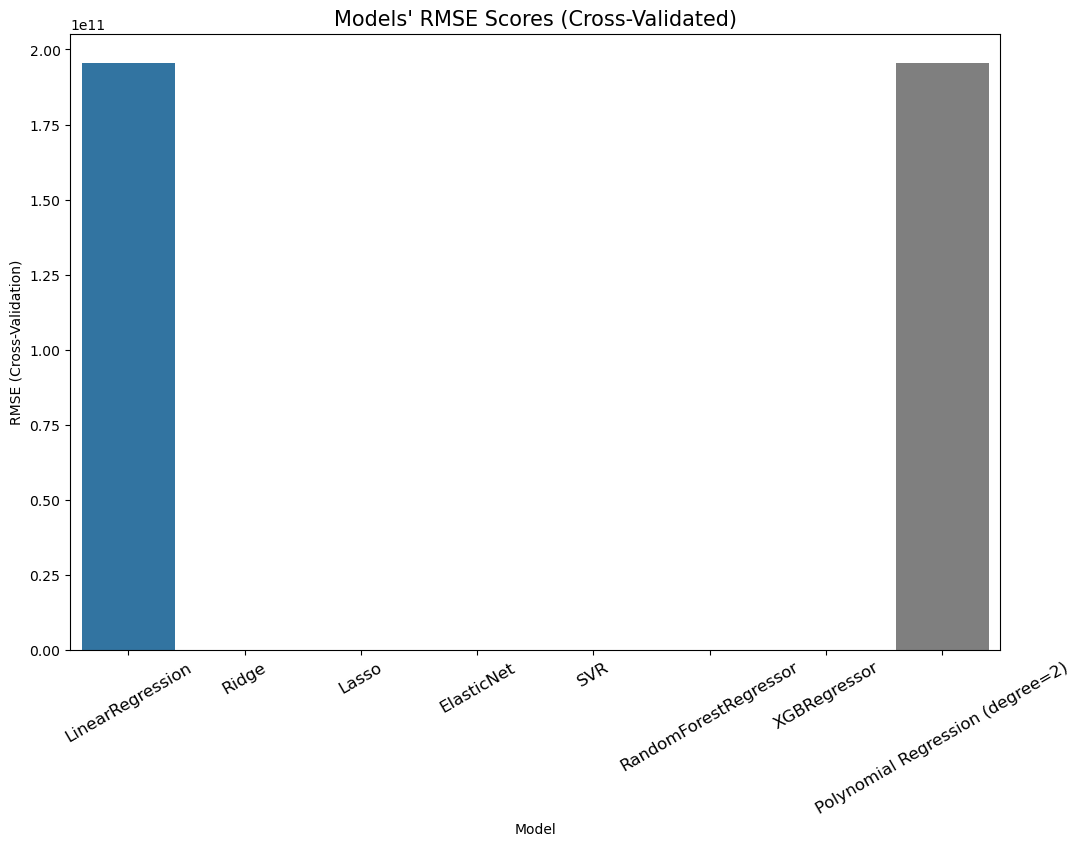

In [28]:
plot_rmse_scores(models)

In [29]:
from IPython.display import Image
import os
!ls ../input/picdata

111.jpg


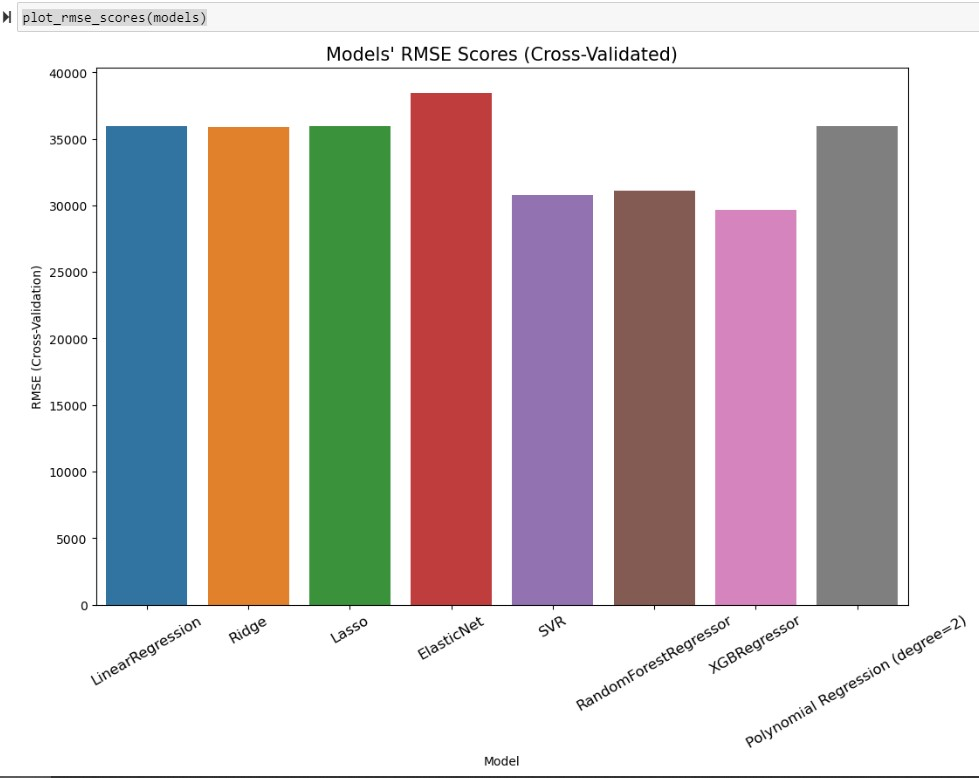

In [30]:
Image('../input/picdata/111.jpg')
#plot_rmse_scores(models) function didn't show that's whay i input there

<center><h2 style="font-family: 'Times New Roman'; letter-spacing: 0.03em;">Thank you so much for reading notebook.If you liked it, please do not forget to give upvote. Take love from my heart, Thank you ✌️ ...</h2></center>